## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# We import libraries and modules needed for this notebook.
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm for obtaining vector representations for words. It is based on the idea that words that appear in similar contexts tend to have similar meanings. GloVe is trained on the aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. GloVe is widely used in Natural Language Processing (NLP) tasks such as sentiment analysis, machine translation, and text classification.

In [ ]:
# First of all, we load the embeddings we downloaded from the GloVe website.
PATH = '/content/glove.6B.200d.txt'
emb_dim = 200

In [ ]:
# This function takes a path to a GloVe embeddings file and returns a dictionary where each word is associated with its corresponding vector representation(embedding).
def create_emb_dictionary(path):
    embeddings_dict = {}                                                    # We create an empty dictionary to store the embeddings.
    with open(path, 'r', encoding='utf-8') as f:                            # We open the file and iterate over each line.
        for line in f:                                                      # For each line, we split the line into a list of values.
            values = line.split()                                           # The first value is the word, the rest are the values of the embedding.
            word = values[0]                                                # We store the word in a variable.
            vector = np.asarray(values[1:], dtype='float32')                # We store the values of the embedding in a numpy array.
            embeddings_dict[word] = vector                                  # We add the word and its embedding to the dictionary.
    return embeddings_dict                                                  # Finally, we return the dictionary.


To use this function, you would call it with the path to the GloVe file as an argument, and it will return a dictionary where each word is associated with its corresponding vector representation.

In [ ]:
# Create Dictionary
# We call the functuion previously define with the path of the embedding files and store it in a new variable.
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Serialize
with open('embeddings_dict_200D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

Serialization is the process of converting a Python object into a stream of bytes that can be saved to a file or transmitted over a network. In this case, the embeddings_dict object is being serialized and saved to a file named embeddings_dict_50D.pkl using the pickle.dump() method. In this case we used the python module pickle:

https://docs.python.org/3/library/pickle.html



#### See some embeddings

In [ ]:
# Then we define a function that prints the first n_words words in the file, along with their corresponding embeddings.
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
# We call the function with the path to the embeddings file and the number of words we want to print as arguments.
show_n_first_words(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

In [ ]:
# Import necessary libraries
import numpy as np

# Define a function to plot word embeddings
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func):
    # Load embeddings from file
    with open(emb_path, 'r', encoding='utf-8') as f:            # We open the file at the specified path.
        embeddings = {}                                         # We create an empty dictionary to store the embeddings.
        for line in f:
            values = line.split()
            word = values[0]                                    # We store the word in a variable.
            vector = np.array(values[1:], dtype='float32')      # We store the values of the embedding in a numpy array.
            embeddings[word] = vector

    # Get embeddings for words to show
    word_embeddings = []
    for word in words2show:
        if word in embeddings_dict:
            word_embeddings.append(embeddings_dict[word])       # We append the embedding of the word to the list of embeddings.
        else:
            print(f"{word} not found in embeddings dictionary.")
            return

    # Apply dimensionality reduction
    if func == PCA:
        embeddings_reduced = PCA(n_components=2).fit_transform(np.array(word_embeddings))   # We apply PCA to reduce the dimensionality of the embeddings to 2 dimensions.
    elif func == TSNE:
        embeddings_reduced = TSNE(n_components=2).fit_transform(np.array(word_embeddings))  # We apply t-SNE to reduce the dimensionality of the embeddings to 2 dimensions.
    else:
        print("Invalid function specified.")
        return

    # Plot embeddings
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1])  # We plot the embeddings in two dimensions.

    for i, word in enumerate(words2show):
        ax.annotate(word, (embeddings_reduced[i, 0], embeddings_reduced[i, 1]))


This function takes a path to a GloVe embeddings file, a list of words to plot, the dimension of the embeddings, the embeddings dictionary, and a function to use for dimensionality reduction (either PCA or t-SNE), and plots the embeddings of the specified words.


In [ ]:
# We define the word to serch for, scatter plot and cluster.
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


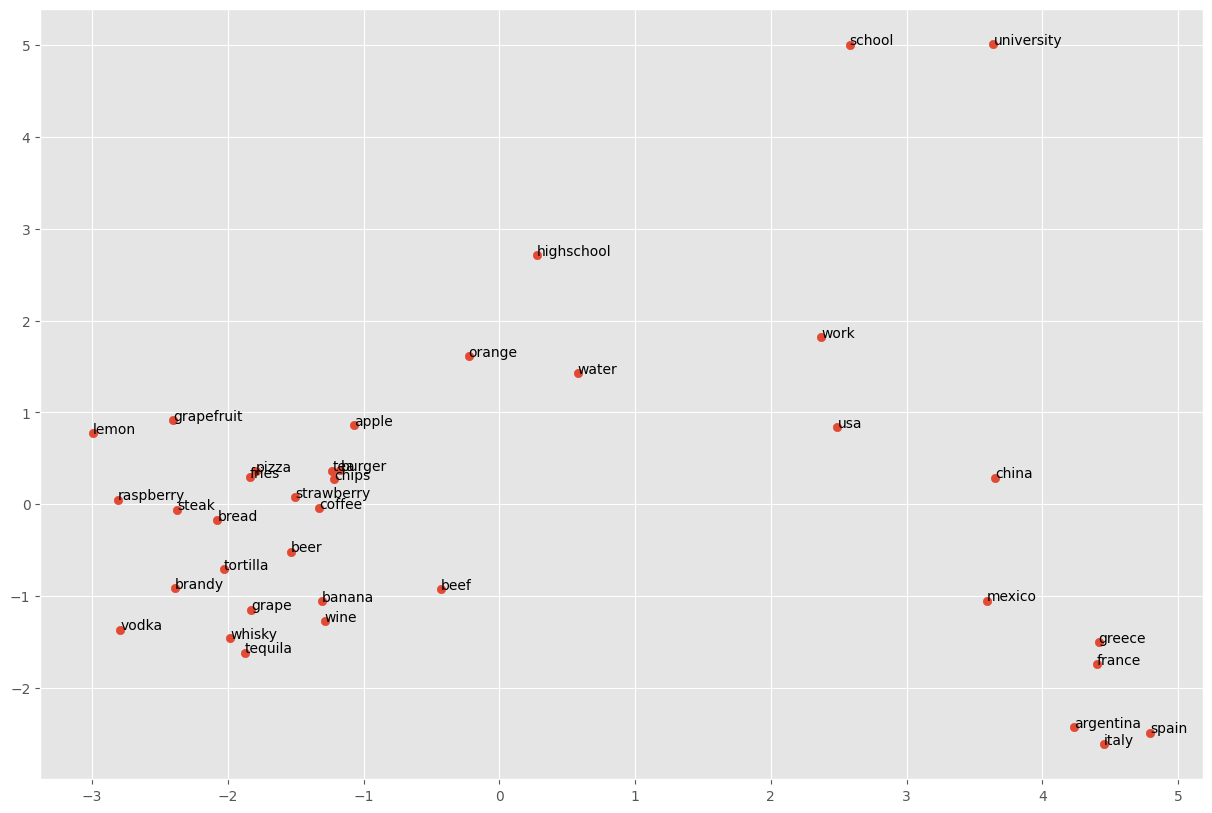

In [ ]:
# We use the preveously define function.
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

We can visualize clear clusters like the one for the countries, but no so much for the drinks, fruits and foods, this might be for the typo of dimension reduction technique used, PCA when you want to reduce dimensionality while maintaining global structure, such as feature reduction for machine learning or preprocessing.


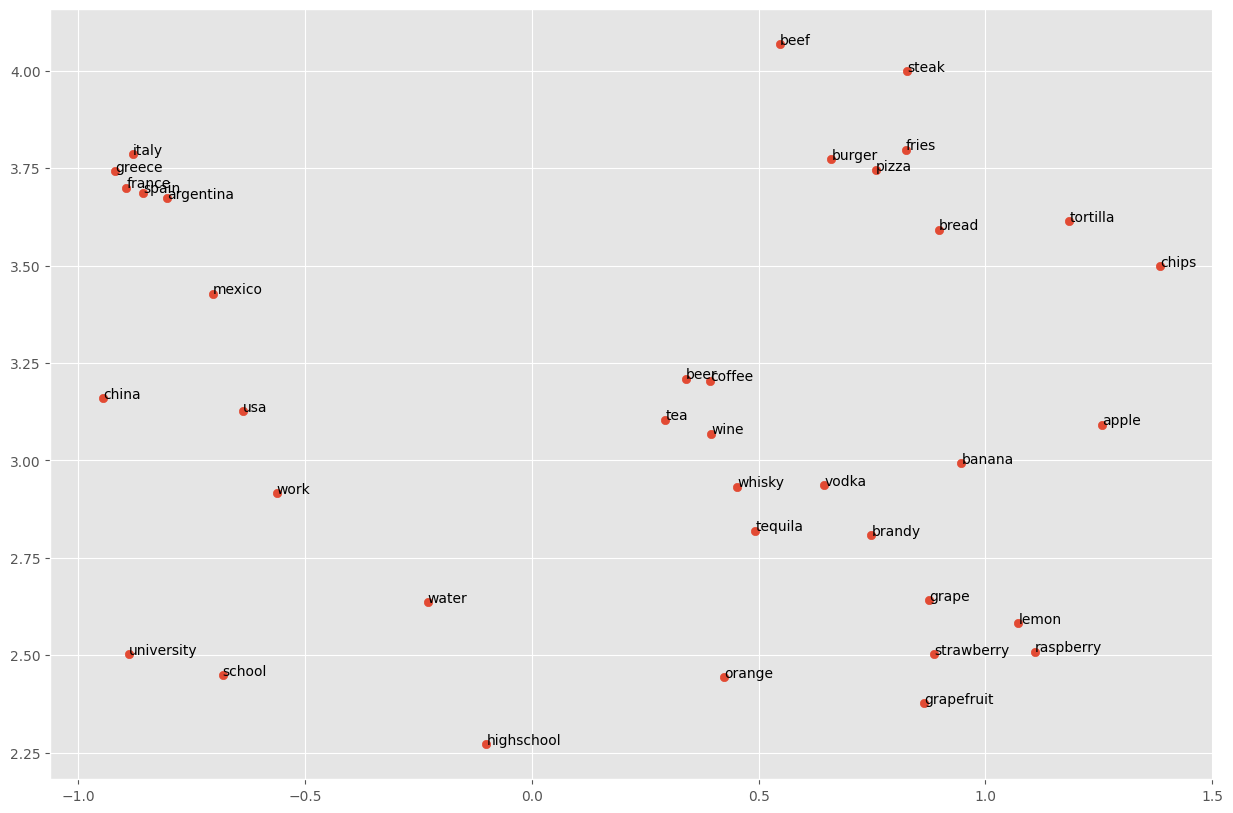

In [ ]:
# t-SNE dimensionality reduction for visualization.
plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

We can visualize that compared of PCA, tSNE is more accurate clustering words accordingly to its  word type. t-SNE is way more usefull when you want to visualize and explore data clusters, discover patterns, or gain insights into data with a focus on preserving local structure.


The choice between PCA and t-SNE depends on your specific goals. If you want to reduce dimensionality while preserving global relationships, PCA is a good choice. If you want to visualize or explore data patterns, especially in a non-linear and local context, t-SNE may be more suitable.

### Let us compute analogies

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def analogy(word1, word2, word3, embeddings_dict):
    # Check if all three words are in the embeddings dictionary
    if word1 not in embeddings_dict:
        print(f"{word1} not found in embeddings dictionary.")
        return
    if word2 not in embeddings_dict:
        print(f"{word2} not found in embeddings dictionary.")
        return
    if word3 not in embeddings_dict:
        print(f"{word3} not found in embeddings dictionary.")
        return

    # Compute the vector difference between word2 and word1
    diff = embeddings_dict[word2] - embeddings_dict[word1]

    # Add the difference to the vector for word3
    new_vec = embeddings_dict[word3] + diff

    # Compute the cosine similarity between the new vector and all other vectors in the embeddings dictionary
    similarities = {}
    for word, vec in embeddings_dict.items():
        if word not in [word1, word2, word3]:
            # We compute the cosine similarity between the new vector and the vector for each word in the embeddings dictionary.
            similarities[word] = cosine_similarity(new_vec.reshape(1, -1), vec.reshape(1, -1))[0][0]

    # Sort the similarities in descending order and return the top 10 words
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:10]


This  code finds the words that are related to word3 in a way that is similar to how word2 is related to word1, using the cosine similarity of word embeddings. This can be used for tasks like finding analogies, such as "king - man + woman = queen," where word1 is "king," word2 is "man," and word3 is "woman."


In [ ]:
# We put to work the preveously define function for analogies.
analogy('man', 'king', 'woman', embeddings_dict)

[('queen', 0.7119165),
 ('princess', 0.6121215),
 ('monarch', 0.6024806),
 ('prince', 0.596004),
 ('throne', 0.59153134),
 ('daughter', 0.5588055),
 ('elizabeth', 0.5547403),
 ('kingdom', 0.54945177),
 ('mother', 0.54198164),
 ('crown', 0.5347209)]

In [ ]:
# Then we create the last function, this one recives a word to serch and replies with the most similiar to itself.
def find_most_similar(word, embeddings_dict, top_n=10):
    # Check if the input word is in the embeddings dictionary
    if word not in embeddings_dict:
        print(f"{word} not found in embeddings dictionary.")
        return

    # Compute the cosine similarity between the input word's embedding and all other embeddings in the dictionary
    similarities = {}
    for w, emb in embeddings_dict.items():
        if w != word:
          # We compute the cosine similarity between the input word's embedding and the embedding of each word in the embeddings dictionary.
            similarities[w] = cosine_similarity(embeddings_dict[word].reshape(1, -1), emb.reshape(1, -1))[0][0]

    # Sort the similarities in descending order and return the top_n most similar words
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]


  This function takes a word, a dictionary of word embeddings, and an optional argument top_n (default value 10) that specifies the number of most similar words to return.
  It returns a list of the top_n most similar words to the input word, based on cosine similarity between their embeddings.

In [ ]:
# We call the function with the word 'mexico' and the embeddings dictionary as arguments.
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
# We iterate over the list of most similar words and print them.
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> guatemala
6 ---> argentina
7 ---> brazil
8 ---> chile
9 ---> bolivia
10 ---> america


For the last two probles the cosine usses the  similarity to find words whose vectors are in a similar direction to the expected relationship between the words involved in the analogy, and it ranks those words based on their cosine similarity values. Words with higher cosine similarity values are considered more similar in the context of the analogy.